In [1]:
import numpy as np
from scipy import misc, signal
import matplotlib.pyplot as plt
import copy
from skimage import exposure
import imageio
%matplotlib inline

## Part 1

In [2]:
cameraman_origin = misc.imread('cameraman.tif')

AttributeError: module 'scipy.misc' has no attribute 'imread'

__Notes__

    imread is deprecated in SciPy 1.0.0, and will be removed in 1.2.0. 
    So I use imageio.imread in the following instead.

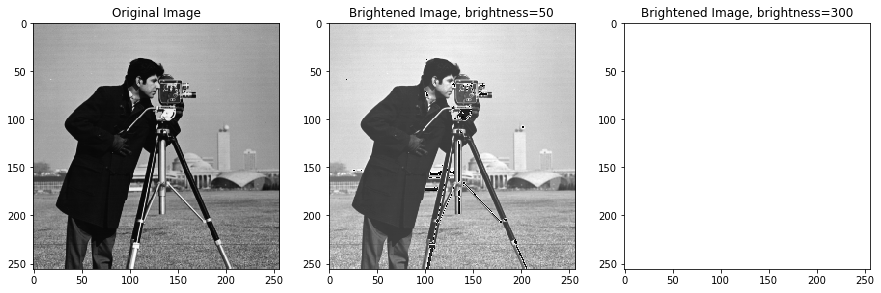

In [3]:
# Implement this function
def imadd(pic,brightness=50):
    # Add brightness to each pixel
    return pic + brightness


# Read the image
cameraman_origin = imageio.imread('cameraman.tif')
# Create a copy of the origina image for us to manipulate
cameraman_bright_50 = copy.deepcopy(cameraman_origin)
cameraman_bright_300 = copy.deepcopy(cameraman_origin)

# Call imadd to perform enhancement
cameraman_bright_50 = imadd(cameraman_bright_50,50)
cameraman_bright_300 = imadd(cameraman_bright_300,300)

# Show the results
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.title('Original Image')
plt.imshow(cameraman_origin,cmap='gray',vmin = 0, vmax = 255)
plt.subplot(132)
plt.title('Brightened Image, brightness=50')
plt.imshow(cameraman_bright_50,cmap='gray',vmin = 0, vmax = 255)
plt.subplot(133)
plt.title('Brightened Image, brightness=300')
plt.imshow(cameraman_bright_300,cmap='gray',vmin = 0, vmax = 255)
plt.show()

In [4]:
print('The numbers of distinct pixel values in the above three images are respectively', 
      len(np.unique(cameraman_origin)), len(np.unique(cameraman_bright_50)), len(np.unique(cameraman_bright_300)) )

The numbers of distinct pixel values in the above three images are respectively 247 247 247


__Comments__

The dynamic range (the number of distinct pixel values in an image) of the orginal and the enhanced image are both 247, because simply adding a constant does not affect the number of distinct values. 

But since the gray-scale value range of uint8 is 0-255, the pixels whose value exceeds 255 will appear white, hence the number of pixels with distinct color may decrease when we brighten an image.

When we increase the brightness by 300, all pixel values will exceeds 255, so the picture looks purely white.

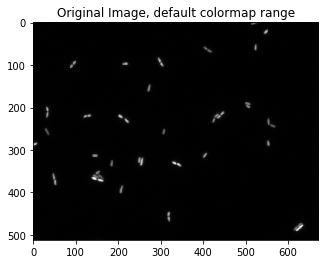

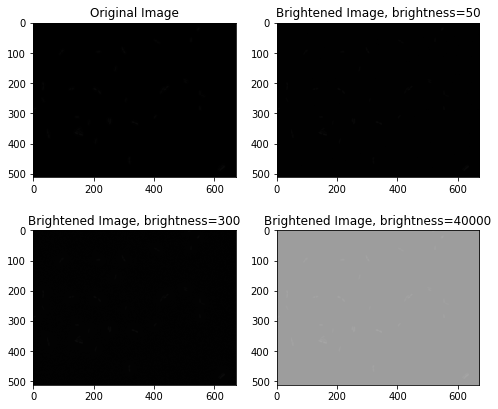

In [5]:
# Read the image
eco_origin = imageio.imread('eco.tif')
# Create a copy of the origina image for us to manipulate
eco_bright_50 = copy.deepcopy(eco_origin)
eco_bright_300 = copy.deepcopy(eco_origin)
eco_bright_40000 = copy.deepcopy(eco_origin)

# Call imadd to perform enhancement
eco_bright_50 = imadd(eco_bright_50,50)
eco_bright_300 = imadd(eco_bright_300,300)
eco_bright_40000 = imadd(eco_bright_40000,40000)

# Show the results
plt.figure()
plt.title('Original Image, default colormap range')
plt.imshow(eco_origin,cmap='gray')
plt.figure(figsize=(8,7))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(eco_origin,cmap='gray', vmin=0, vmax=2**16-1)
plt.subplot(222)
plt.title('Brightened Image, brightness=50')
plt.imshow(eco_bright_50,cmap='gray', vmin=0, vmax=2**16-1)
plt.subplot(223)
plt.title('Brightened Image, brightness=300')
plt.imshow(eco_bright_300,cmap='gray', vmin=0, vmax=2**16-1)
plt.subplot(224)
plt.title('Brightened Image, brightness=40000')
plt.imshow(eco_bright_40000,cmap='gray', vmin=0, vmax=2**16-1)
plt.show()

In [6]:
print('The numbers of distinct pixel values in the above three images are respectively',
     len(np.unique(eco_origin)), len(np.unique(eco_bright_50)), len(np.unique(eco_bright_300)))

The numbers of distinct pixel values in the above three images are respectively 1748 1748 1748


The quality of the image eco.tif cannot be enhanced by simply increasing its brightness. 

Because the gray-scale value range of uint16 is 0-65535, the brightness increment 50 and 300 are too small compared to the range, so the image looks completely black. If we increase the brightness to a larger value like 40000, it still looks completely grey. 

That's because, as we can see from the image with default colormap range (in which the colormap covers the complete value range of the supplied data), the gray scale values of the eco.tif is so unevenly distributed that most of the pixels are dark while the bright pixels are sparse. So adding a constant to every pixels will not increase the quality of the image.

## Part 2

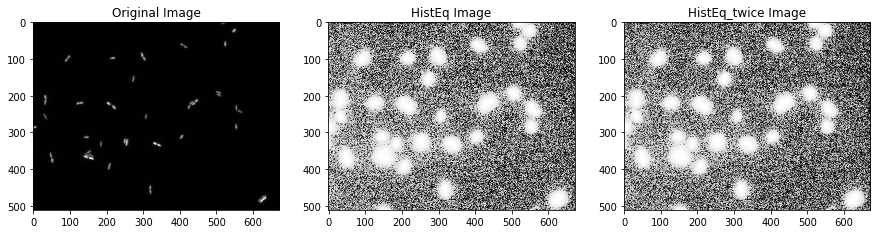

In [7]:
# Read the image
eco_origin = imageio.imread('eco.tif')

# Apply Histogram Equalization here!
eco_histeq = exposure.equalize_hist(eco_origin)
eco_histeq_twice = exposure.equalize_hist(eco_histeq)

# Show the results
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.title('Original Image')
plt.imshow(eco_origin,cmap='gray')
plt.subplot(132)
plt.title('HistEq Image')
plt.imshow(eco_histeq,cmap='gray')
plt.subplot(133)
plt.title('HistEq_twice Image')
plt.imshow(eco_histeq_twice,cmap='gray')
plt.show()

### Question
Q: Can you improve the result of enhancement by repeating the histogram equalization? Why?

- No. If an image is histogram equalized, its gray values are uniformly distributed, repeating the histogram equalization on it will just produce the same result.

## Part 3

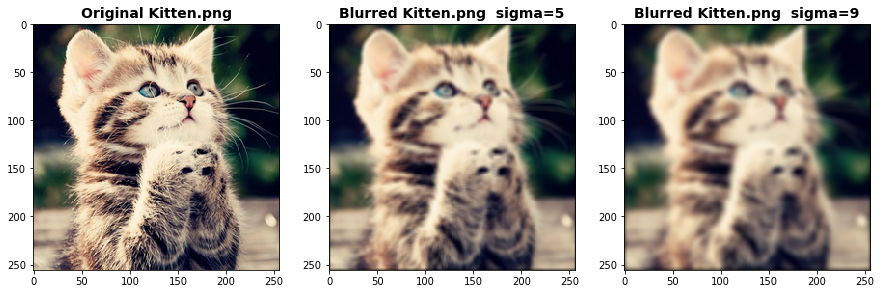

In [8]:
# Gaussian Kernel Following the Descriptiong: 
# http://www.mathworks.com/help/images/ref/fspecial.html
def gengaussian(size=5,sigma=3.0):
    if size%2==0 or size<2:
        print('Size Not Valid')
        return None
    kernel = np.zeros((size,size))
    for x in range(size):
        for y in range(size):
            kernel[x][y] = np.exp(-((x-(size-1)/2)**2 \
                           +(y-(size-1)/2)**2)/(2*sigma**2))
    kernel = kernel / np.sum(kernel)
    return kernel

# Read Image and Display
kitten_origin = imageio.imread('kitten.png')
# Create a copy of the origina image for us to manipulate
kitten_blur_5 = copy.deepcopy(kitten_origin)
kitten_blur_9 = copy.deepcopy(kitten_origin)
# Generate Kernel
kernel_5 = gengaussian(5)
kernel_9 = gengaussian(9)
# Apply Convolution Here!
for i in range(3):
    kitten_blur_5[:,:,i] = signal.convolve2d(kitten_origin[:,:,i], kernel_5, mode='same')
    kitten_blur_9[:,:,i] = signal.convolve2d(kitten_origin[:,:,i], kernel_9, mode='same')

# Display Results
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.title('Original Kitten.png', fontsize=14, fontweight='bold')
plt.imshow(kitten_origin,vmin = 0, vmax = 255)
plt.subplot(132)
plt.title('Blurred Kitten.png  sigma=5', fontsize=14, fontweight='bold')
plt.imshow(kitten_blur_5,vmin = 0, vmax = 255)
plt.subplot(133)
plt.title('Blurred Kitten.png  sigma=9', fontsize=14, fontweight='bold')
plt.imshow(kitten_blur_9,vmin = 0, vmax = 255)
plt.show()

A larger sigma produce a more blurry image.